<a href="https://colab.research.google.com/github/yashrajmodani/Data-Analaysis/blob/main/Day7_Z_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import zscore

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
#Calc mean and std of the glucose column
glucose_mean = df['Glucose'].mean()
glucose_std = df['Glucose'].std()

In [ ]:
print(f'Mean of Glucose: {glucose_mean}')
print(f'Std of Glucose: {glucose_std}')

Mean of Glucose: 120.89453125
Std of Glucose: 31.97261819513622


In [ ]:
#Calc z score for glucose level of 168(Using manual method)
glucose_value = 168
z_score_168_manual = (glucose_value - glucose_mean)/glucose_std
print(f'Z score for {glucose_value} is {z_score_168_manual}')

Z score for 168 is 1.4733065794769926


In [ ]:
#This will add a column for the z score of glucose for each record
df['Glucose_Z_Score'] = zscore(df['Glucose'])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Z_Score
0,6,148,72,35,0,33.6,0.627,50,1,0.848324
1,1,85,66,29,0,26.6,0.351,31,0,-1.123396
2,8,183,64,0,0,23.3,0.672,32,1,1.943724
3,1,89,66,23,94,28.1,0.167,21,0,-0.998208
4,0,137,40,35,168,43.1,2.288,33,1,0.504055
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,-0.622642
764,2,122,70,27,0,36.8,0.340,27,0,0.034598
765,5,121,72,23,112,26.2,0.245,30,0,0.003301
766,1,126,60,0,0,30.1,0.349,47,1,0.159787


In [ ]:
#Find the row index where glucose = 168
df['Glucose'] == glucose_value  #Return true where glucose = 168
#Now get the actual record for 168
#.index returns the indicie of the row matching this condition
row_index = df[df['Glucose'] == glucose_value].index

In [ ]:
#Now we extract the first row from glucose zscore df where glucose = 168
#Hence row_index[0] ... Remember we may have multiple rows matching 168

z_score_168_using_function = df['Glucose_Z_Score'].iloc[row_index[0]]
print(f"Z score for glucose level of 168 is: {z_score_168_using_function}")

Z score for glucose level of 168 is: 1.4742667011686503


In [ ]:
#Calc the percentile for this z score
percentile_168 = stats.norm.cdf(z_score_168_manual) * 100  #Mult by 100 to get %
print(f"Percentile for glucose level of 168 is: {percentile_168}")

Percentile for glucose level of 168 is: 92.96658063066623


In [ ]:
#Find the z score at 30th percentile
z_score_30th_percentile = stats.norm.ppf(0.30)
print(f"Z score at 30th percentile is: {z_score_30th_percentile}")


Z score at 30th percentile is: -0.5244005127080409


In [ ]:
#Calc the corresponding glucose value for the z score of the 30th percentile
glucose_at_30th_percentile = z_score_30th_percentile * glucose_std + glucose_mean
print(f"Glucose value corresponding to 30th percentile is: {glucose_at_30th_percentile}")

Glucose value corresponding to 30th percentile is: 104.12807387585212


In [ ]:
#given z score of 2.8 calc the corresponding glucose level
z_score_given = 2.8
glucose_value_given = glucose_mean + z_score_given * glucose_std
print(f"Glucose value corresponding to z score of 2.8 is: {glucose_value_given}")

Glucose value corresponding to z score of 2.8 is: 210.4178621963814


In [ ]:
#Calc the percentile for the z score of 2.8
percentile_given = stats.norm.cdf(z_score_given) * 100
print(f"Percentage for z score of 2.8 is: {percentile_given}%")

Percentage for z score of 2.8 is: 99.7444869669572%


# ***Tips Dataset ***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('/content/tips.csv')

In [ ]:
#Extract the total_bill column into a new series
total_bill_series = data['total_bill']
total_bill_series

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59
...,...
239,29.03
240,27.18
241,22.67
242,17.82


In [ ]:
#Calc mean and std
mu, std = total_bill_series.mean(), total_bill_series.std()

In [ ]:
#Calc z score for each value
z_scores = (total_bill_series - mu)/std
z_scores

,total_bill
0,-0.314066
1,-1.061054
2,0.137497
3,0.437416
4,0.539635
...,...
239,1.038377
240,0.830568
241,0.323964
242,-0.220833


In [ ]:
#Plot normal distribution graph of the bill
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Frequency')

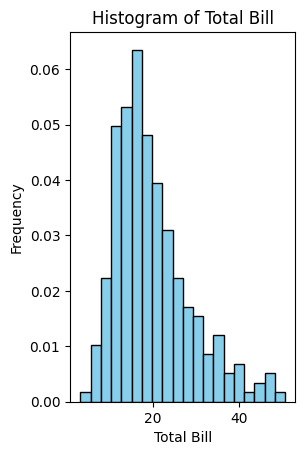

In [ ]:
#Histogram
plt.subplot(1, 2, 1)
plt.hist(total_bill_series, bins=20, color='skyblue', edgecolor='black', density=True)
plt.title('Histogram of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')

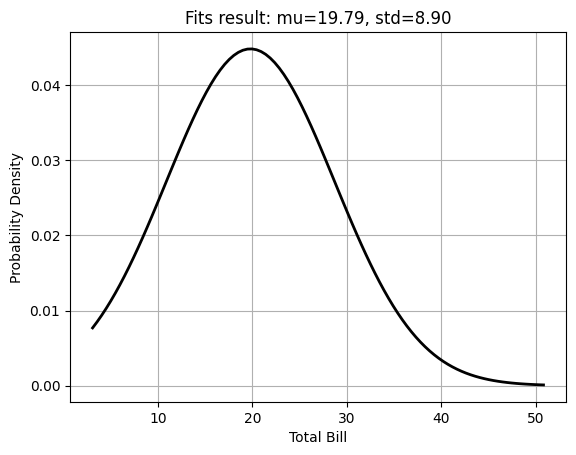

In [ ]:
#Fit a normal distribution to the data
x = np.linspace(total_bill_series.min(), total_bill_series.max(), 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = 'Fits result: mu=%.2f, std=%.2f' % (mu, std)
plt.title(title)
plt.xlabel('Total Bill')
plt.ylabel('Probability Density')
plt.grid(True)

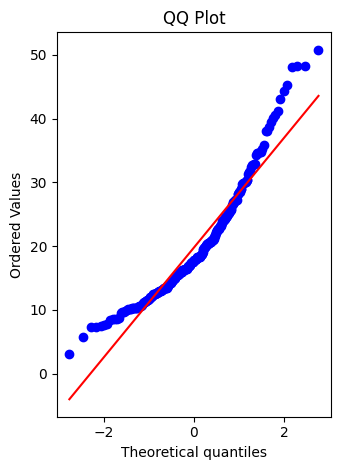

In [ ]:
#QQ Plot
plt.subplot(1, 2, 2)
stats.probplot(total_bill_series, dist='norm', plot=plt)
plt.title('QQ Plot')
plt.tight_layout()
plt.show()

(array([0.00171695, 0.0103017 , 0.02232036, 0.04979156, 0.05322546,
        0.06352717, 0.04807461, 0.03948986, 0.03090511, 0.02232036,
        0.0171695 , 0.01545255, 0.00858475, 0.01201865, 0.00515085,
        0.0068678 , 0.00171695, 0.0034339 , 0.00515085, 0.00171695]),
 array([ 3.07 ,  5.457,  7.844, 10.231, 12.618, 15.005, 17.392, 19.779,
        22.166, 24.553, 26.94 , 29.327, 31.714, 34.101, 36.488, 38.875,
        41.262, 43.649, 46.036, 48.423, 50.81 ]),
 <BarContainer object of 20 artists>)

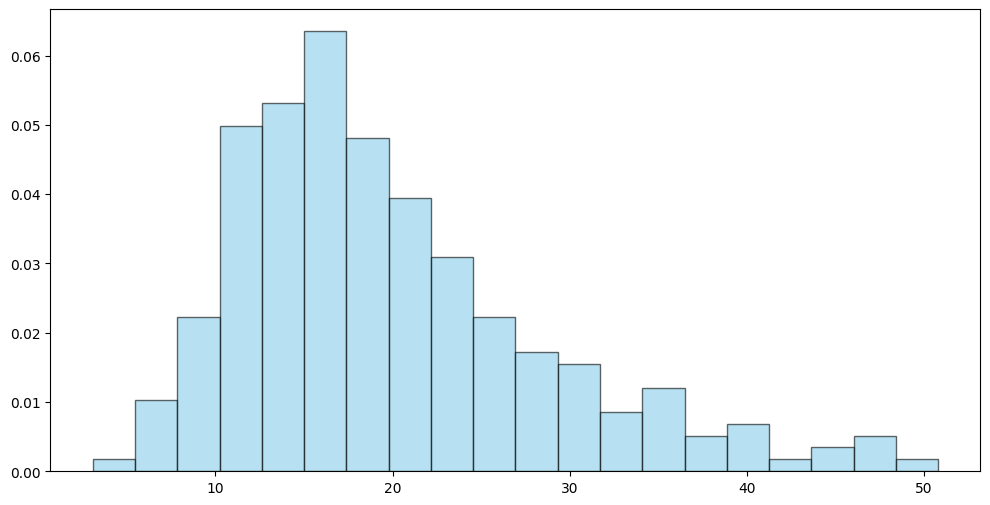

In [ ]:
#Plot showing mean +-3 SD
plt.figure(figsize=(12, 6))
plt.hist(total_bill_series, bins=20, color='skyblue', edgecolor='black', density=True, alpha=0.6)

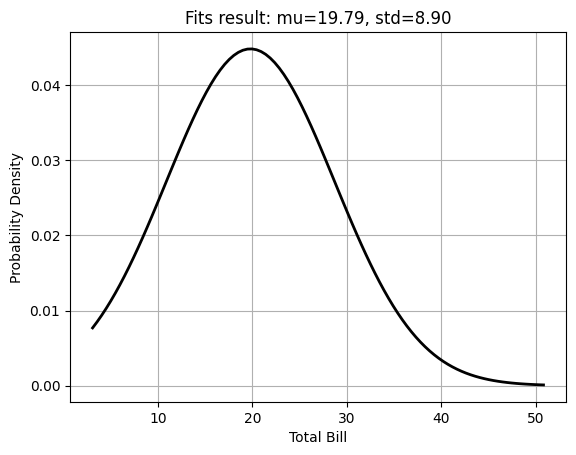

In [ ]:
#Fit a normal distribution to the data
x = np.linspace(total_bill_series.min(), total_bill_series.max(), 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = 'Fits result: mu=%.2f, std=%.2f' % (mu, std)
plt.title(title)
plt.xlabel('Total Bill')
plt.ylabel('Probability Density')
plt.grid(True)

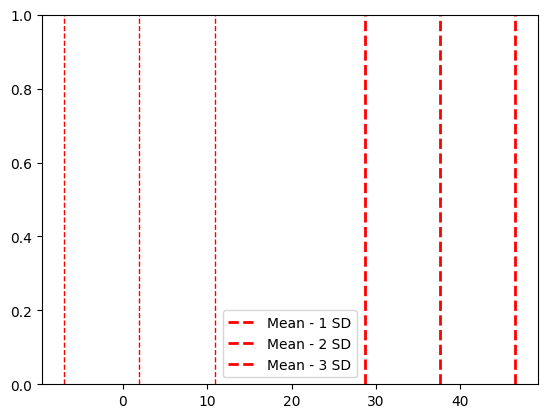

In [ ]:
#Plot mean +-3 SD
for i in range(1, 4):
  plt.axvline(mu + i * std, color='r', linestyle='dashed', linewidth=2, label=f'Mean - {i} SD')
  plt.axvline(mu - i * std, color='r', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

In [ ]:
#Check if mean +-1SD, mean +-2SD, mean +-3SD satisfy the empirical rule
within_1sd = (z_scores <= 1) & (z_scores >= -1)
within_2sd = (z_scores <= 2) & (z_scores >= -2)
within_3sd = (z_scores <= 3) & (z_scores >= -3)

In [ ]:
percentage_within_1sd = np.sum(within_1sd) / len(total_bill_series) * 100
percentage_within_2sd = np.sum(within_2sd) / len(total_bill_series) * 100
percentage_within_3sd = np.sum(within_3sd) / len(total_bill_series) * 100

print(f"Percentage of values within 1 SD: {percentage_within_1sd:.2f}%")
print(f"Percentage of values within 2 SD: {percentage_within_2sd:.2f}%")
print(f"Percentage of values within 3 SD: {percentage_within_3sd:.2f}%")


Percentage of values within 1 SD: 72.13%
Percentage of values within 2 SD: 94.26%
Percentage of values within 3 SD: 98.36%


In [ ]:
#Create df to store bill, z score,and within 1sd, 2sd, 3sd flags
result_df = pd.DataFrame({'Total_Bill': total_bill_series, 'Z_Score': z_scores, 'within_2sd': within_2sd, 'within_1sd': within_3sd, 'within_1sd': within_3sd})

In [ ]:
print(result_df)

     Total_Bill   Z_Score  within_2sd  within_1sd
0         16.99 -0.314066        True        True
1         10.34 -1.061054        True        True
2         21.01  0.137497        True        True
3         23.68  0.437416        True        True
4         24.59  0.539635        True        True
..          ...       ...         ...         ...
239       29.03  1.038377        True        True
240       27.18  0.830568        True        True
241       22.67  0.323964        True        True
242       17.82 -0.220833        True        True
243       18.78 -0.112997        True        True

[244 rows x 4 columns]


In [ ]:
import os
if os.path.exists('result_df.csv'):
  os.remove('result_df.csv')

result_df.to_csv('result_df.csv', index=False)


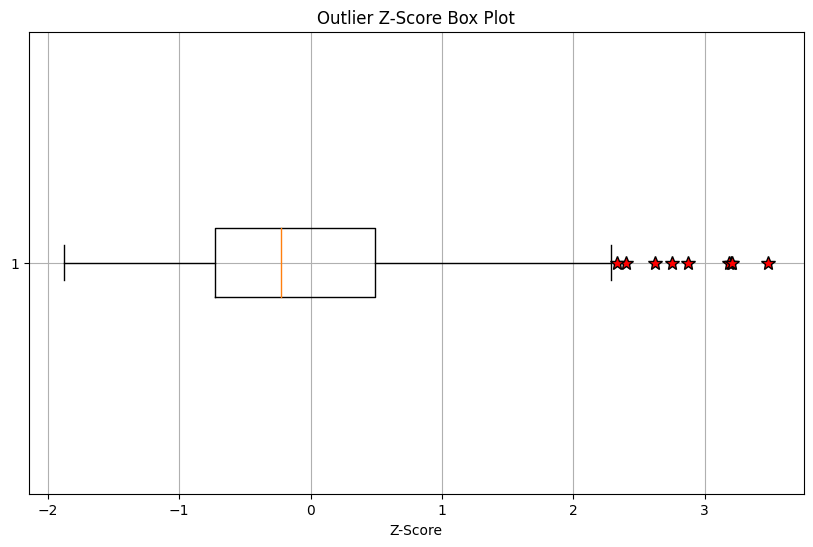

In [ ]:
#Filter outliers
outliers = result_df[(result_df['Z_Score'] < -3) | (result_df['Z_Score'] > 3) ]

#Outlier z score box plot
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.boxplot(result_df['Z_Score'], vert=False, flierprops=dict(marker='*', markerfacecolor='red', markersize = 10))
plt.xlabel('Z-Score')
plt.title('Outlier Z-Score Box Plot')
plt.grid(True)
plt.show()